In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import py4DSTEM
import hyperspy.api as hs
from itertools import combinations
from matplotlib.patches import Rectangle

Loading: raw_data\Si-SiGe.dm4
Original shape: (480, 448, 77, 17)
Inferred scan axes (R_axes): (2, 3) shape: (77, 17)
Inferred diffraction axes (Q_axes): (0, 1) shape: (480, 448)
Fixed shape (Rx, Ry, Qx, Qy): (77, 17, 480, 448)
 - Navigation (Real space) = (77, 17)
 - Signal (Reciprocal space) = (480, 448)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hype

C:\Users\User\miniconda3\envs\mse465\Lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: get_file_handle has been moved to `rsciio.utils.file` and will be removed from `rsciio.utils.tools` in version 1.0.
  warnings.warn(message, VisibleDeprecationWarning)
C:\Users\User\miniconda3\envs\mse465\Lib\site-packages\rsciio\utils\rgb_tools.py:46: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(
C:\Users\User\miniconda3\envs\mse465\Lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: ensure_directory has been moved to `rsciio.utils.path` and will be removed from `rsciio.utils.tools` in version 1.0.
  warnings.warn(message, VisibleDeprecationWarning)


WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:256)


C:\Users\User\miniconda3\envs\mse465\Lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: append2pathname has been moved to `rsciio.utils.path` and will be removed from `rsciio.utils.tools` in version 1.0.
  warnings.warn(message, VisibleDeprecationWarning)
C:\Users\User\miniconda3\envs\mse465\Lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: incremental_filename has been moved to `rsciio.utils.path` and will be removed from `rsciio.utils.tools` in version 1.0.
  warnings.warn(message, VisibleDeprecationWarning)
C:\Users\User\miniconda3\envs\mse465\Lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: ensure_directory has been moved to `rsciio.utils.path` and will be removed from `rsciio.utils.tools` in version 1.0.
  warnings.warn(message, VisibleDeprecationWarning)
C:\Users\User\miniconda3\envs\mse465\Lib\site-packages\rsciio\utils\tools.py:93: VisibleDeprecationWarning: overwrite has been moved to `rsciio.utils.path` and will b


[Task 1] HyperSpy axes_manager (expect 2 navigation + 2 signal):
<Axes manager, axes: (17, 77|448, 480)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
     <undefined> |     17 |      0 |       0 |       1 | <undefined> 
     <undefined> |     77 |      0 |       0 |       1 | <undefined> 
---------------- | ------ | ------ | ------- | ------- | ------ 
     <undefined> |    448 |      0 |       0 |       1 | <undefined> 
     <undefined> |    480 |      0 |       0 |       1 | <undefined> 
navigation_shape: (17, 77)
signal_shape    : (448, 480)
Saved figure: diffraction_patterns_Qspace.png


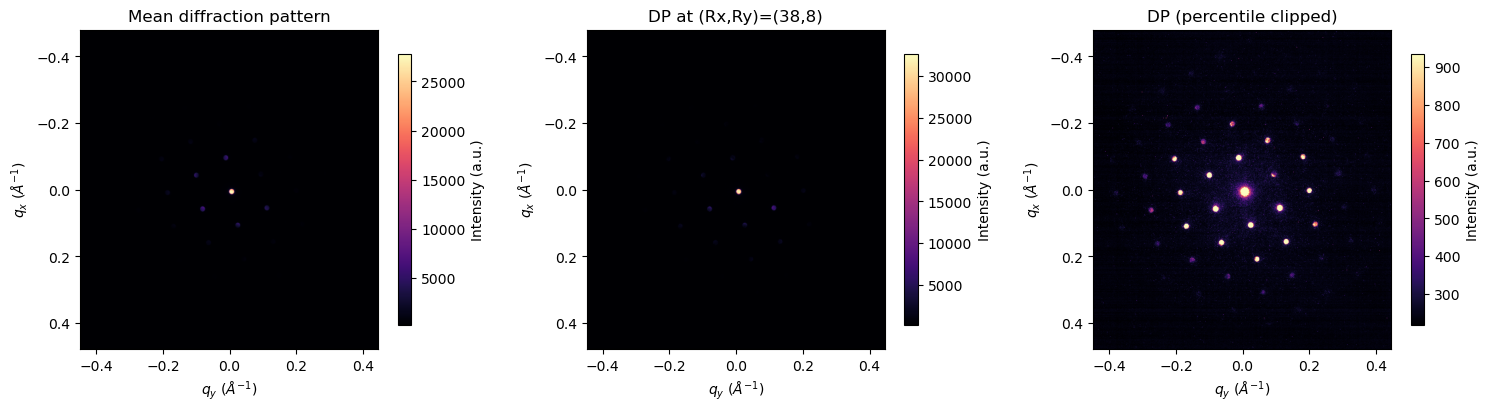

In [4]:
filename = "Si-SiGe.dm4"
if not os.path.exists(filename):
    filename = os.path.join("raw_data", filename)

print("Loading:", filename)
dataset = py4DSTEM.io.import_file(filename)

data_raw = np.asarray(dataset.data)
print("Original shape:", data_raw.shape)

if data_raw.ndim != 4:
    raise ValueError(f"Expected 4D data, but got ndim={data_raw.ndim}, shape={data_raw.shape}")

dims = list(data_raw.shape)

axis_pairs = list(combinations(range(4), 2))
pair_products = [(ax1, ax2, dims[ax1] * dims[ax2]) for ax1, ax2 in axis_pairs]

ax_r1, ax_r2, _ = min(pair_products, key=lambda x: x[2])
R_axes = (ax_r1, ax_r2)
Q_axes = tuple(ax for ax in range(4) if ax not in R_axes)

R_shape = (dims[R_axes[0]], dims[R_axes[1]])
Q_shape = (dims[Q_axes[0]], dims[Q_axes[1]])

print("Inferred scan axes (R_axes):", R_axes, "shape:", R_shape)
print("Inferred diffraction axes (Q_axes):", Q_axes, "shape:", Q_shape)

data_reordered = np.transpose(
    data_raw,
    axes=(R_axes[0], R_axes[1], Q_axes[0], Q_axes[1])
)

Rx, Ry, Qx, Qy = data_reordered.shape
print("Fixed shape (Rx, Ry, Qx, Qy):", data_reordered.shape)

dataset.data_reordered = data_reordered

print(" - Navigation (Real space) =", (Rx, Ry))
print(" - Signal (Reciprocal space) =", (Qx, Qy))

hs_signal = hs.signals.Signal2D(dataset.data_reordered)
print("\n[Task 1] HyperSpy axes_manager (expect 2 navigation + 2 signal):")
print(hs_signal.axes_manager)
print("navigation_shape:", hs_signal.axes_manager.navigation_shape)
print("signal_shape    :", hs_signal.axes_manager.signal_shape)

# Hard check: fail early if not 2 navigation + 2 signal
if len(hs_signal.axes_manager.navigation_shape) != 2 or len(hs_signal.axes_manager.signal_shape) != 2:
    raise ValueError(
        f"Expected 2 navigation + 2 signal axes, got "
        f"navigation={hs_signal.axes_manager.navigation_shape}, "
        f"signal={hs_signal.axes_manager.signal_shape}"
    )
    
Q_PIXEL_SCALE_INV_A = 0.002  # Å^{-1} per pixel

qy = (np.arange(Qy) - Qy / 2) * Q_PIXEL_SCALE_INV_A
qx = (np.arange(Qx) - Qx / 2) * Q_PIXEL_SCALE_INV_A
extent_q = [qy[0], qy[-1], qx[-1], qx[0]]

ix, iy = Rx // 2, Ry // 2
dp = dataset.data_reordered[ix, iy]
dp_mean = dataset.data_reordered.mean(axis=(0, 1))

vmin, vmax = np.percentile(dp, (1, 99.7))

fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

im0 = axes[0].imshow(dp_mean, cmap="magma", extent=extent_q)
axes[0].set_title("Mean diffraction pattern")
axes[0].set_xlabel(r"$q_y$ ($\AA^{-1}$)")
axes[0].set_ylabel(r"$q_x$ ($\AA^{-1}$)")
cbar0 = fig.colorbar(im0, ax=axes[0], shrink=0.85)
cbar0.set_label("Intensity (a.u.)")

im1 = axes[1].imshow(dp, cmap="magma", extent=extent_q)
axes[1].set_title(f"DP at (Rx,Ry)=({ix},{iy})")
axes[1].set_xlabel(r"$q_y$ ($\AA^{-1}$)")
axes[1].set_ylabel(r"$q_x$ ($\AA^{-1}$)")
cbar1 = fig.colorbar(im1, ax=axes[1], shrink=0.85)
cbar1.set_label("Intensity (a.u.)")

im2 = axes[2].imshow(dp, cmap="magma", vmin=vmin, vmax=vmax, extent=extent_q)
axes[2].set_title("DP (percentile clipped)")
axes[2].set_xlabel(r"$q_y$ ($\AA^{-1}$)")
axes[2].set_ylabel(r"$q_x$ ($\AA^{-1}$)")
cbar2 = fig.colorbar(im2, ax=axes[2], shrink=0.85)
cbar2.set_label("Intensity (a.u.)")

out_name = "diffraction_patterns_Qspace.png"
plt.savefig(out_name, dpi=300, bbox_inches="tight")
print(f"Saved figure: {out_name}")

plt.show()

In [5]:
SCAN_STEP_NM = 2.0  # change if instructor specifies
assert SCAN_STEP_NM > 0, "SCAN_STEP_NM must be positive."

set_ok = False
used_method = None
err_msgs = []

setters = [
    ("dataset.set_scan_step_size(SCAN_STEP_NM)", lambda: dataset.set_scan_step_size(SCAN_STEP_NM)),
    ("dataset.calibration.scan_step_size = SCAN_STEP_NM", lambda: setattr(dataset.calibration, "scan_step_size", SCAN_STEP_NM)),
    ("dataset.R_step_size = SCAN_STEP_NM", lambda: setattr(dataset, "R_step_size", SCAN_STEP_NM)),
]
for name, fn in setters:
    try:
        fn()
        set_ok = True
        used_method = name
        break
    except Exception as e:
        err_msgs.append(f"{name} -> {type(e).__name__}: {e}")

if not hasattr(dataset, "user_metadata"):
    dataset.user_metadata = {}
dataset.user_metadata["scan_step_nm"] = SCAN_STEP_NM

print(f"scan step size = {SCAN_STEP_NM} nm/px")
print(f" - set_ok = {set_ok}")
print(f" - used_method = {used_method}")
if not set_ok:
    print(" - All setters failed. Errors:")
    for m in err_msgs:
        print("   ", m)
    print("\nTip: run `type(dataset)` and `dir(dataset)` to see which calibration fields exist in your py4DSTEM version.")

scan step size = 2.0 nm/px
 - set_ok = True
 - used_method = dataset.calibration.scan_step_size = SCAN_STEP_NM


Beam center (pixels): qy_c=225.09 (col), qx_c=241.48 (row)


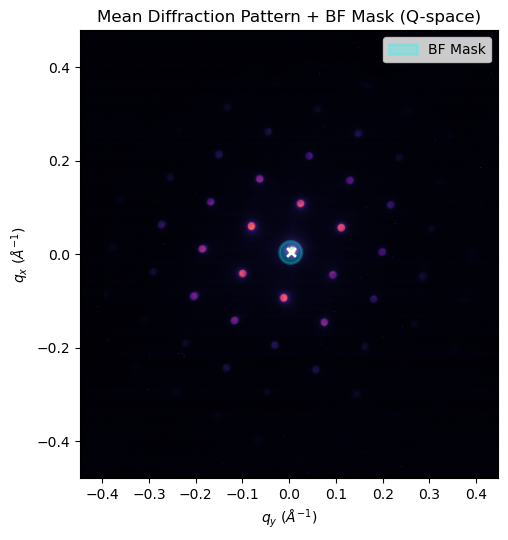

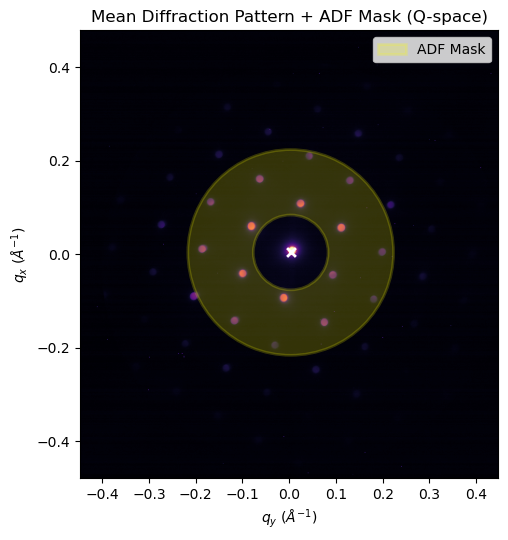

Saved: DP_with_BF_mask_Qspace.png, DP_with_ADF_mask_Qspace.png


In [16]:
mean_dp = dataset.data_reordered.mean(axis=(0, 1)).astype(np.float64)
Qx, Qy = mean_dp.shape
yy, xx = np.indices((Qx, Qy))  # yy=row->Qx index, xx=col->Qy index

qy0_pix = (Qy - 1) / 2.0
qx0_pix = (Qx - 1) / 2.0
r0 = np.sqrt((xx - qy0_pix)**2 + (yy - qx0_pix)**2)

center_r_pix = 40
center_mask = (r0 < center_r_pix)

w = mean_dp * center_mask
s = max(w.sum(), 1e-12)

qx_c_pix = float((yy * w).sum() / s)  # row index (Qx axis)
qy_c_pix = float((xx * w).sum() / s)  # col index (Qy axis)

print(f"Beam center (pixels): qy_c={qy_c_pix:.2f} (col), qx_c={qx_c_pix:.2f} (row)")

Q_PIXEL_SCALE_INV_A = 0.002  # <-- keep your value

qy_vals = (np.arange(Qy) - (Qy - 1) / 2.0) * Q_PIXEL_SCALE_INV_A
qx_vals = (np.arange(Qx) - (Qx - 1) / 2.0) * Q_PIXEL_SCALE_INV_A
extent_q = [qy_vals[0], qy_vals[-1], qx_vals[0], qx_vals[-1]]  # x=qy, y=qx

qy_c = (qy_c_pix - (Qy - 1) / 2.0) * Q_PIXEL_SCALE_INV_A
qx_c = (qx_c_pix - (Qx - 1) / 2.0) * Q_PIXEL_SCALE_INV_A

bf_radius_pix = 12
adf_inner_pix = 40
adf_outer_pix = 110

bf_r_q = bf_radius_pix * Q_PIXEL_SCALE_INV_A
adf_r_in_q = adf_inner_pix * Q_PIXEL_SCALE_INV_A
adf_r_out_q = adf_outer_pix * Q_PIXEL_SCALE_INV_A

fig, ax = plt.subplots(figsize=(6.5, 5.5))
ax.imshow(np.log10(mean_dp + 1), cmap="magma", origin="lower", extent=extent_q)

bf_circle = patches.Circle(
    (qy_c, qx_c), bf_r_q,
    facecolor="cyan", edgecolor="cyan", alpha=0.25, lw=2, label="BF Mask"
)
ax.add_patch(bf_circle)

ax.scatter([qy_c], [qx_c], s=40, c="white", marker="x", linewidths=2)
ax.set_title("Mean Diffraction Pattern + BF Mask (Q-space)")
ax.set_xlabel(r"$q_y$ ($\AA^{-1}$)")
ax.set_ylabel(r"$q_x$ ($\AA^{-1}$)")
ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig("DP_with_BF_mask_Qspace.png", dpi=300, bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(figsize=(6.5, 5.5))
ax.imshow(np.log10(mean_dp + 1), cmap="magma", origin="lower", extent=extent_q)

adf_ring = patches.Wedge(
    center=(qy_c, qx_c),
    r=adf_r_out_q,
    theta1=0, theta2=360,
    width=(adf_r_out_q - adf_r_in_q),
    facecolor="yellow", edgecolor="yellow", alpha=0.20, lw=2, label="ADF Mask"
)
ax.add_patch(adf_ring)

ax.scatter([qy_c], [qx_c], s=40, c="white", marker="x", linewidths=2)
ax.set_title("Mean Diffraction Pattern + ADF Mask (Q-space)")
ax.set_xlabel(r"$q_y$ ($\AA^{-1}$)")
ax.set_ylabel(r"$q_x$ ($\AA^{-1}$)")
ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig("DP_with_ADF_mask_Qspace.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: DP_with_BF_mask_Qspace.png, DP_with_ADF_mask_Qspace.png")



CoM center BEFORE centering (cx, cy) = (225.34, 241.73)
Applying global Q-shift (roll) dx=-2, dy=-2 (pixels)
Centering method used: global np.roll(dx=-2, dy=-2)
CoM center AFTER centering (cx, cy) = (224.31, 240.72)
Saved figure: mean_diffraction_with_CoM.png


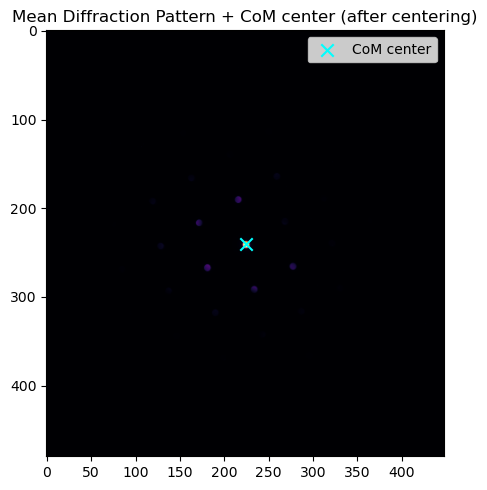

Saved figure: radial_intensity_profile_pixels_r0.png


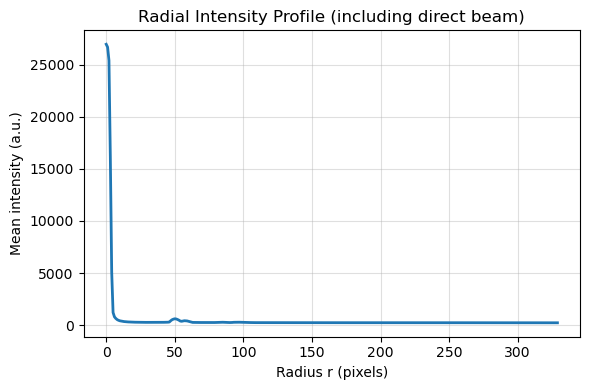

Saved figure: radial_intensity_profile_pixels.png


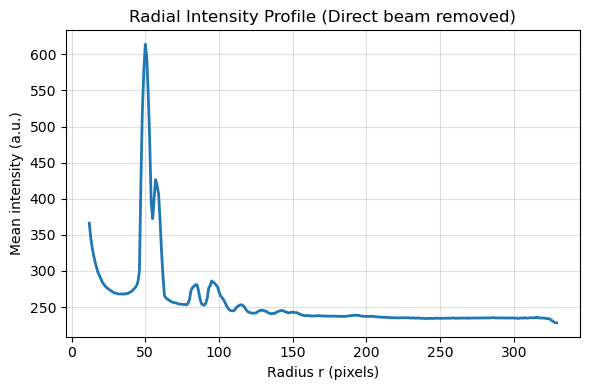

In [18]:
data4d = dataset.data_reordered.mean(axis=(0, 1)).astype(np.float64)

mean_dp = dataset.data_reordered.mean(axis=(0, 1)).astype(np.float64)
ny, nx = mean_dp.shape
yy, xx = np.indices(mean_dp.shape)

cy0, cx0 = ny / 2, nx / 2
r0 = np.sqrt((xx - cx0)**2 + (yy - cy0)**2)
beam_mask = r0 < 40

w = mean_dp * beam_mask
s = max(w.sum(), 1e-12)

cy = float((yy * w).sum() / s)
cx = float((xx * w).sum() / s)

print(f"CoM center BEFORE centering (cx, cy) = ({cx:.2f}, {cy:.2f})")

data4d_full = dataset.data_reordered.astype(np.float64)  # (Rx,Ry,Qx,Qy)

data4d_centered = None
used_centering = None

if hasattr(dataset, "get_diffraction_shifts"):
    try:
        shifts = dataset.get_diffraction_shifts()
        used_centering = "dataset.get_diffraction_shifts()"

        # Try to apply shifts using common method names across py4DSTEM versions
        if hasattr(dataset, "apply_diffraction_shifts"):
            dataset.apply_diffraction_shifts(shifts)
            data4d_centered = np.asarray(dataset.data)
            used_centering += " + dataset.apply_diffraction_shifts()"
        elif hasattr(dataset, "correct_diffraction_shifts"):
            dataset.correct_diffraction_shifts(shifts)
            data4d_centered = np.asarray(dataset.data)
            used_centering += " + dataset.correct_diffraction_shifts()"
        else:
            # No applier found -> fall back to global roll
            print("get_diffraction_shifts() exists, but no apply/correct method found. Falling back to global roll.")
            data4d_centered = None
            used_centering = None

    except Exception as e:
        print(f"get_diffraction_shifts() failed ({type(e).__name__}: {e}). Falling back to global roll.")
        data4d_centered = None
        used_centering = None

if data4d_centered is None:
    target_cx, target_cy = (nx - 1) / 2.0, (ny - 1) / 2.0
    shift_x = int(round(target_cx - cx))
    shift_y = int(round(target_cy - cy))
    print(f"Applying global Q-shift (roll) dx={shift_x}, dy={shift_y} (pixels)")
    data4d_centered = np.roll(data4d_full, shift=(shift_y, shift_x), axis=(2, 3))
    used_centering = f"global np.roll(dx={shift_x}, dy={shift_y})"

print("Centering method used:", used_centering)

dataset.data_used = data4d_centered  # later cells use centered data

mean_dp2 = data4d_centered.mean(axis=(0, 1))
w2 = mean_dp2 * beam_mask
s2 = w2.sum()
cy2 = float((yy * w2).sum() / s2)
cx2 = float((xx * w2).sum() / s2)
print(f"CoM center AFTER centering (cx, cy) = ({cx2:.2f}, {cy2:.2f})")

plt.figure(figsize=(6,5))
plt.imshow(mean_dp2, cmap="inferno")
plt.scatter(cx2, cy2, c="cyan", marker="x", s=80, label="CoM center")
plt.title("Mean Diffraction Pattern + CoM center (after centering)")
plt.legend()
plt.tight_layout()

plt.savefig("mean_diffraction_with_CoM.png", dpi=300, bbox_inches="tight")
print("Saved figure: mean_diffraction_with_CoM.png")

plt.show()

r = np.sqrt((xx - cx2)**2 + (yy - cy2)**2).astype(np.int32)

# include direct beam => no r_min cutoff
radial_sum = np.bincount(r.ravel(), weights=mean_dp2.ravel())
radial_cnt = np.bincount(r.ravel())

radial_profile = radial_sum / np.maximum(radial_cnt, 1)
r_values = np.arange(len(radial_profile))

# plot from r=0
plt.figure(figsize=(6,4))
plt.plot(r_values, radial_profile, lw=2)
plt.xlabel("Radius r (pixels)")
plt.ylabel("Mean intensity (a.u.)")
plt.title("Radial Intensity Profile (including direct beam)")
plt.grid(True, alpha=0.4)
plt.tight_layout()

plt.savefig("radial_intensity_profile_pixels_r0.png", dpi=300, bbox_inches="tight")
print("Saved figure: radial_intensity_profile_pixels_r0.png")

plt.show()

r = np.sqrt((xx - cx2)**2 + (yy - cy2)**2).astype(np.int32)

r_min = 12  # remove direct

radial_sum = np.bincount(r.ravel(), mean_dp2.ravel())
radial_cnt = np.bincount(r.ravel())

radial_profile = radial_sum / np.maximum(radial_cnt, 1)
r_values = np.arange(len(radial_profile))

mask = r_values >= r_min

plt.figure(figsize=(6,4))
plt.plot(r_values[mask], radial_profile[mask], lw=2)
plt.xlabel("Radius r (pixels)")
plt.ylabel("Mean intensity (a.u.)")
plt.title("Radial Intensity Profile (Direct beam removed)")
plt.grid(True, alpha=0.4)
plt.tight_layout()

plt.savefig("radial_intensity_profile_pixels.png", dpi=300, bbox_inches="tight")
print("Saved figure: radial_intensity_profile_pixels.png")

plt.show()

cx, cy = cx2, cy2

In [5]:
def integrate_virtual_image(data4d, mask2d):
    mask = mask2d.astype(np.float64)
    return np.tensordot(data4d, mask, axes=([2, 3], [0, 1]))


def run_pipeline(
    data4d,
    detectors,
    scan_step_nm=2.0,
    q_pixel_scale_invA=0.002
):

    results = {
        "metadata": {
            "scan_step_nm": float(scan_step_nm),
            "q_pixel_scale_invA": float(q_pixel_scale_invA),
        },
        "images": {},
        "metrics": {}
    }

    I = data4d.sum(axis=(2, 3)).astype(np.float64)
    results["metrics"]["total_intensity"] = I

    # per-scan CoM maps
    Qx, Qy = data4d.shape[2], data4d.shape[3]
    yy, xx = np.indices((Qx, Qy))

    Mx = np.tensordot(data4d, xx, axes=([2, 3], [0, 1])).astype(np.float64)
    My = np.tensordot(data4d, yy, axes=([2, 3], [0, 1])).astype(np.float64)

    denom = np.maximum(I, 1e-12)
    com_x = Mx / denom
    com_y = My / denom

    results["metrics"]["CoM_map_pixels"] = {
        "cx": com_x,
        "cy": com_y
    }

    mean_dp = data4d.mean(axis=(0, 1)).astype(np.float64)
    s = np.maximum(mean_dp.sum(), 1e-12)

    cy_mean = float((yy * mean_dp).sum() / s)
    cx_mean = float((xx * mean_dp).sum() / s)

    results["metrics"]["CoM_meanDP_pixels"] = (cx_mean, cy_mean)

    # radial intensity profile from mean DP (stable bincount)
    r_int = np.sqrt((xx - cx_mean)**2 + (yy - cy_mean)**2).astype(np.int32)
    radial_sum = np.bincount(r_int.ravel(), mean_dp.ravel())
    radial_cnt = np.bincount(r_int.ravel())
    radial_profile = radial_sum / np.maximum(radial_cnt, 1)

    r_vals = np.arange(len(radial_profile))
    results["metrics"]["radial_profile_meanDP"] = {
        "r_pixels": r_vals,
        "r_invA": r_vals * q_pixel_scale_invA,
        "intensity": radial_profile
    }

    for name, mask in detectors.items():
        results["images"][name] = integrate_virtual_image(data4d, mask)

    return results

def disk_mask(shape, cx, cy, r):
    Qx, Qy = shape
    yy, xx = np.indices((Qx, Qy))
    rr = np.sqrt((xx - cx)**2 + (yy - cy)**2)
    return rr <= r

def annulus_mask(shape, cx, cy, r_in, r_out):
    Qx, Qy = shape
    yy, xx = np.indices((Qx, Qy))
    rr = np.sqrt((xx - cx)**2 + (yy - cy)**2)
    return (rr >= r_in) & (rr <= r_out)

data4d = dataset.data_used if hasattr(dataset, "data_used") else dataset.data_reordered
Qx, Qy = data4d.shape[2], data4d.shape[3]

cx0, cy0 = float(cx), float(cy)

r_bf = 20
r_adf_in = 70
r_adf_out = 140

mask_bf = disk_mask((Qx, Qy), cx0, cy0, r_bf)
mask_adf = annulus_mask((Qx, Qy), cx0, cy0, r_adf_in, r_adf_out)

assert mask_bf.any(), "BF mask is empty"
assert mask_adf.any(), "ADF mask is empty"
assert r_adf_out > r_adf_in > r_bf, "Choose radii: r_adf_out > r_adf_in > r_bf"

bf_image = integrate_virtual_image(data4d, mask_bf)
adf_image = integrate_virtual_image(data4d, mask_adf)

print("BF shape:", bf_image.shape, "ADF shape:", adf_image.shape)
print("BF mask pixels:", mask_bf.sum(), "ADF mask pixels:", mask_adf.sum())

BF shape: (77, 17) ADF shape: (77, 17)
BF mask pixels: 1257 ADF mask pixels: 46178


Saved figure: total_intensity_and_CoM_maps.png


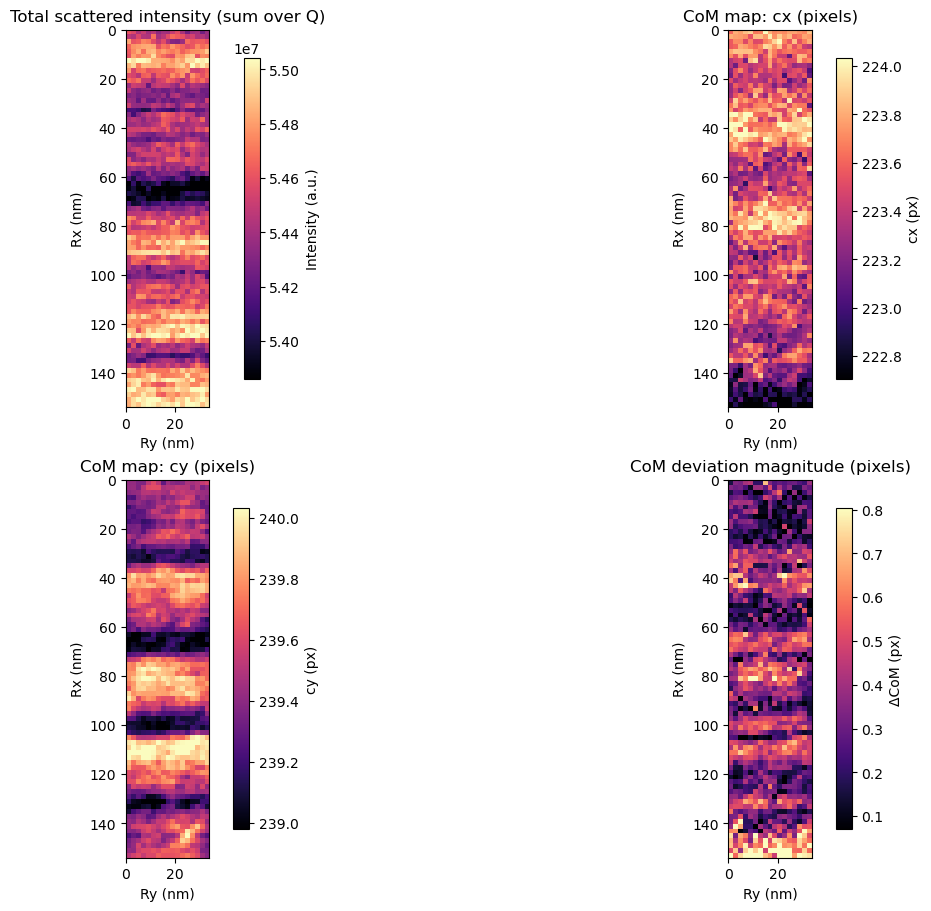

In [6]:
results = run_pipeline(
    data4d=(dataset.data_used if hasattr(dataset, "data_used") else dataset.data_reordered),
    detectors={
        "BF": mask_bf,
        "ADF": mask_adf
    },
    scan_step_nm=SCAN_STEP_NM,
    q_pixel_scale_invA=Q_PIXEL_SCALE_INV_A
)

# --- Step-by-step (extra-safe): plot total intensity + CoM maps ---
I = results["metrics"]["total_intensity"]
com = results["metrics"]["CoM_map_pixels"]
com_x = com["cx"]
com_y = com["cy"]
com_mag = np.sqrt((com_x - np.nanmean(com_x))**2 + (com_y - np.nanmean(com_y))**2)

scan_step_nm = float(results["metadata"]["scan_step_nm"])
Rx, Ry = I.shape
extent = [0, Ry * scan_step_nm, Rx * scan_step_nm, 0]

def _imshow_pct(ax, img, title, cmap="magma", p_low=2, p_high=98):
    vmin, vmax = np.percentile(img[np.isfinite(img)], (p_low, p_high))
    im = ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax, extent=extent)
    ax.set_title(title)
    ax.set_xlabel("Ry (nm)")
    ax.set_ylabel("Rx (nm)")
    return im

fig, axes = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True)

im0 = _imshow_pct(axes[0, 0], I, "Total scattered intensity (sum over Q)")
fig.colorbar(im0, ax=axes[0, 0], shrink=0.85).set_label("Intensity (a.u.)")

im1 = _imshow_pct(axes[0, 1], com_x, "CoM map: cx (pixels)")
fig.colorbar(im1, ax=axes[0, 1], shrink=0.85).set_label("cx (px)")

im2 = _imshow_pct(axes[1, 0], com_y, "CoM map: cy (pixels)")
fig.colorbar(im2, ax=axes[1, 0], shrink=0.85).set_label("cy (px)")

im3 = _imshow_pct(axes[1, 1], com_mag, "CoM deviation magnitude (pixels)")
fig.colorbar(im3, ax=axes[1, 1], shrink=0.85).set_label("ΔCoM (px)")

out_name = "total_intensity_and_CoM_maps.png"
plt.savefig(out_name, dpi=300, bbox_inches="tight")
print(f"Saved figure: {out_name}")

plt.show()

Saved figure: virtual_BF_ADF_and_line_profile.png


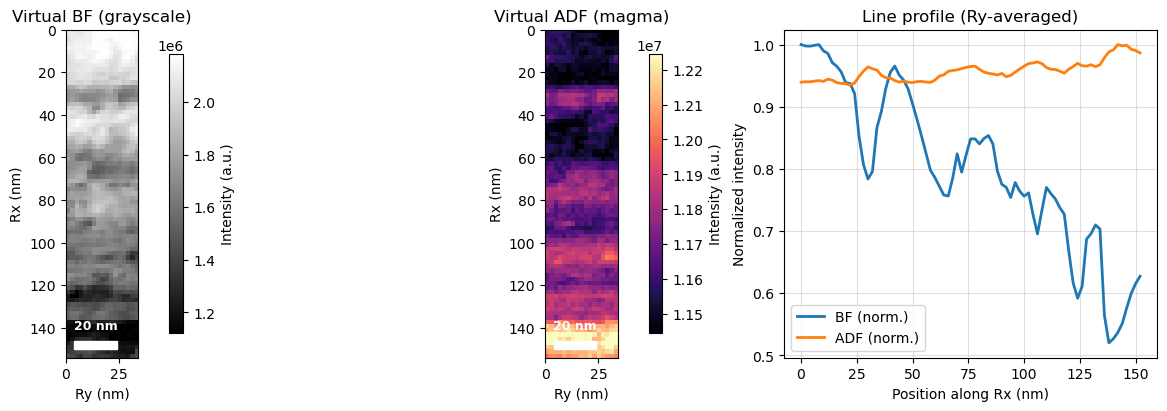

In [7]:
try:
    if hasattr(dataset, "show"):
        dataset.show()
except Exception as e:
    print(f"Interactive viewer not available: {type(e).__name__}: {e}")
SCAN_STEP_NM = results["metadata"]["scan_step_nm"]
SCALE_BAR_NM = 20
CMAP = "magma"

def imshow_percentile(
    ax, img, cmap=CMAP, p_low=2, p_high=98,
    scan_step_nm=SCAN_STEP_NM, title=""
):
    vmin, vmax = np.percentile(img, (p_low, p_high))

    Rx, Ry = img.shape
    extent = [
        0, Ry * scan_step_nm,
        Rx * scan_step_nm, 0
    ]

    im = ax.imshow(
        img,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        extent=extent
    )

    ax.set_title(title)
    ax.set_xlabel("Ry (nm)")
    ax.set_ylabel("Rx (nm)")
    return im

def add_scale_bar(
    ax, img_shape, scan_step_nm,
    bar_nm=SCALE_BAR_NM,
    pad_px=2, bar_h_px=2,
    color="white", text_size=9
):
    Rx, Ry = img_shape
    bar_px = bar_nm / scan_step_nm

    if bar_px > Ry - 2 * pad_px:
        bar_px = Ry - 2 * pad_px
        bar_nm = bar_px * scan_step_nm

    x0 = pad_px * scan_step_nm
    y0 = Rx * scan_step_nm - (pad_px + bar_h_px) * scan_step_nm

    ax.add_patch(Rectangle(
        (x0, y0),
        bar_px * scan_step_nm,
        bar_h_px * scan_step_nm,
        color=color
    ))

    ax.text(
        x0 + (bar_px * scan_step_nm) / 2,
        y0 - 2 * scan_step_nm,
        f"{bar_nm:.0f} nm",
        color=color,
        ha="center",
        va="bottom",
        fontsize=text_size,
        fontweight="bold"
    )

bf_image  = results["images"]["BF"]
adf_image = results["images"]["ADF"]

bf_line = bf_image.mean(axis=1)
adf_line = adf_image.mean(axis=1)

x_nm = np.arange(len(bf_line)) * SCAN_STEP_NM
bf_line_n = bf_line / np.max(bf_line)
adf_line_n = adf_line / np.max(adf_line)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), constrained_layout=True)

# Convention: BF images are typically shown in grayscale
im1 = imshow_percentile(
    axes[0],
    bf_image,
    cmap="gray",
    scan_step_nm=SCAN_STEP_NM,
    title="Virtual BF (grayscale)"
)

add_scale_bar(axes[0], bf_image.shape, SCAN_STEP_NM)
cbar1 = fig.colorbar(im1, ax=axes[0], shrink=0.85)
cbar1.set_label("Intensity (a.u.)")

# Convention: ADF images are typically shown with a high-contrast colormap
im2 = imshow_percentile(
    axes[1],
    adf_image,
    cmap="magma",
    scan_step_nm=SCAN_STEP_NM,
    title="Virtual ADF (magma)"
)

add_scale_bar(axes[1], adf_image.shape, SCAN_STEP_NM)
cbar2 = fig.colorbar(im2, ax=axes[1], shrink=0.85)
cbar2.set_label("Intensity (a.u.)")

axes[2].plot(x_nm, bf_line_n, lw=2, label="BF (norm.)")
axes[2].plot(x_nm, adf_line_n, lw=2, label="ADF (norm.)")
axes[2].set_title("Line profile (Ry-averaged)")
axes[2].set_xlabel("Position along Rx (nm)")
axes[2].set_ylabel("Normalized intensity")
axes[2].grid(alpha=0.4)
axes[2].legend()

out_name = "virtual_BF_ADF_and_line_profile.png"
plt.savefig(out_name, dpi=300, bbox_inches="tight")
print(f"Saved figure: {out_name}")

plt.show()

Estimated interface at Rx index 68 (~ 136.0 nm)
Saved figure: ADF_line_profile_interface.png


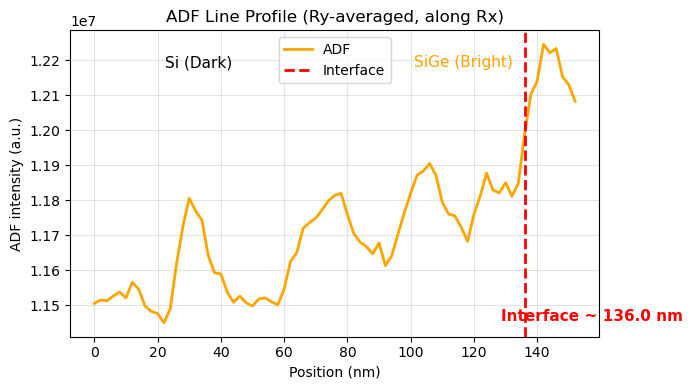

In [8]:
if "results" not in globals():
    results = run_pipeline(
        data4d=(dataset.data_used if hasattr(dataset, "data_used") else dataset.data_reordered),
        detectors={"BF": mask_bf, "ADF": mask_adf},
        scan_step_nm=SCAN_STEP_NM,
        q_pixel_scale_invA=Q_PIXEL_SCALE_INV_A
    )

SCAN_STEP_NM = results["metadata"]["scan_step_nm"]
adf_image = results["images"]["ADF"]

adf_line = adf_image.mean(axis=1)
x_nm = np.arange(len(adf_line)) * SCAN_STEP_NM

w = 7
kernel = np.ones(w) / w
adf_smooth = np.convolve(adf_line, kernel, mode="same")

grad = np.gradient(adf_smooth)
n = len(adf_smooth)
pad = max(3, int(0.10 * n))
grad_roi = grad.copy()
grad_roi[:pad] = 0
grad_roi[-pad:] = 0

ix_interface = int(np.argmax(np.abs(grad_roi)))
x_interface_nm = float(x_nm[ix_interface])

print(f"Estimated interface at Rx index {ix_interface} (~ {x_interface_nm:.1f} nm)")

plt.figure(figsize=(7, 4))
plt.plot(x_nm, adf_line, color="orange", lw=2, label="ADF")
plt.axvline(x_interface_nm, color="red", lw=2, linestyle="--", label="Interface")

plt.title("ADF Line Profile (Ry-averaged, along Rx)")
plt.xlabel("Position (nm)")
plt.ylabel("ADF intensity (a.u.)")
plt.grid(True, alpha=0.35)
plt.legend()

ax = plt.gca()
ax.text(0.18, 0.88, "Si (Dark)", transform=ax.transAxes,
        color="black", fontsize=11)
ax.text(0.65, 0.88, "SiGe (Bright)", transform=ax.transAxes,
        color="orange", fontsize=11)

ymin, ymax = ax.get_ylim()
y_text = ymin + 0.05 * (ymax - ymin)

x_text = max(x_nm.min(), x_interface_nm - 0.05 * (x_nm.max() - x_nm.min()))

ax.text(x_text, y_text, f"Interface ~ {x_interface_nm:.1f} nm",
        color="red", fontsize=11, fontweight="bold")

plt.tight_layout()

out_name = "ADF_line_profile_interface.png"
plt.savefig(out_name, dpi=300, bbox_inches="tight")
print(f"Saved figure: {out_name}")

plt.show()

✅ Tanh fitting successful
   Initial guess x0 ≈ 136.00 nm (from max |dI/dx|)
   Interface position x0 = 136.13 nm
   Width (10–90%)       = 5.26 nm
   RMSE (ROI)           = 5.772e+04
   R² (ROI)             = 0.8846
Saved figure: ADF_line_profile_quantified.png


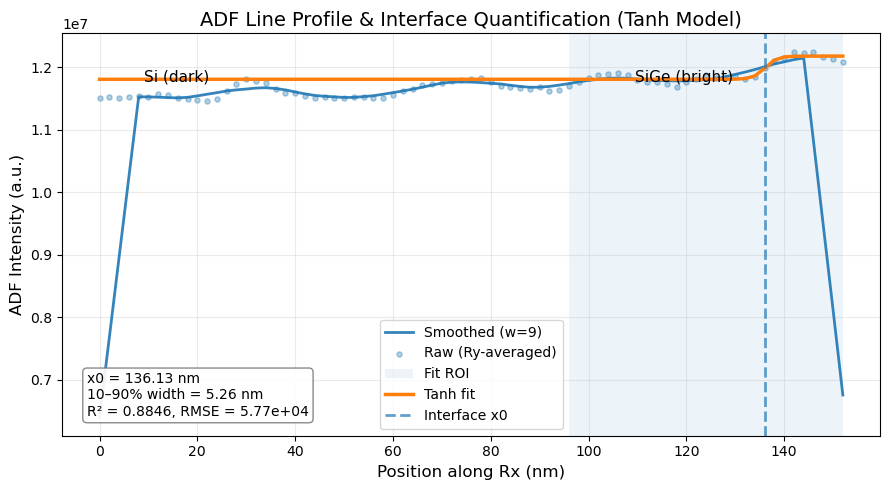

Saved figure: ADF_line_profile_fit_residuals.png


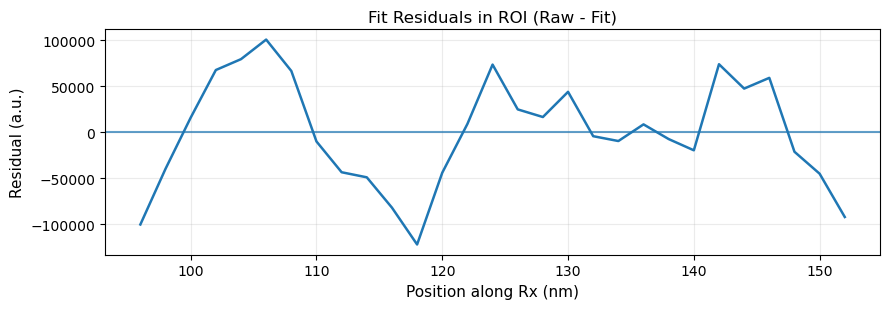

In [9]:
from scipy.optimize import curve_fit

if "results" not in globals():
    results = run_pipeline(
        data4d=(dataset.data_used if hasattr(dataset, "data_used") else dataset.data_reordered),
        detectors={"BF": mask_bf, "ADF": mask_adf},
        scan_step_nm=SCAN_STEP_NM,
        q_pixel_scale_invA=Q_PIXEL_SCALE_INV_A
    )

SCAN_STEP_NM = float(results["metadata"]["scan_step_nm"])
adf_image = results["images"]["ADF"]

adf_line = adf_image.mean(axis=1).astype(np.float64)
x_nm = np.arange(len(adf_line), dtype=np.float64) * SCAN_STEP_NM

w_smooth = 9
kernel = np.ones(w_smooth, dtype=np.float64) / w_smooth
adf_smooth = np.convolve(adf_line, kernel, mode="same")

grad = np.gradient(adf_smooth)
n = len(grad)
pad = max(5, int(0.10 * n))
grad_roi = grad.copy()
grad_roi[:pad] = 0
grad_roi[-pad:] = 0
ix0 = int(np.argmax(np.abs(grad_roi)))
x0_guess = float(x_nm[ix0])

def tanh_profile(x, A, B, x0, w):
    return A + B * np.tanh((x - x0) / w)

ROI_HALF_WIDTH_NM = 40.0
fit_mask = (x_nm >= x0_guess - ROI_HALF_WIDTH_NM) & (x_nm <= x0_guess + ROI_HALF_WIDTH_NM)

x_fit = x_nm[fit_mask]
y_fit = adf_line[fit_mask]

A0 = float(np.median(y_fit))
B0 = float((np.percentile(y_fit, 90) - np.percentile(y_fit, 10)) / 2.0)
w0 = 2.0
p0_guess = [A0, B0, x0_guess, w0]

lower_bounds = [-np.inf, -np.inf, float(x_fit.min()), 0.05]
upper_bounds = [ np.inf,  np.inf, float(x_fit.max()), 200.0]

fit_success = False
A_fit = B_fit = x0_fit = w_fit = np.nan
width_10_90 = np.nan
rmse = np.nan
r2 = np.nan
y_pred_fit = None
residual_fit = None
fit_curve_full = None

try:
    popt, pcov = curve_fit(
        tanh_profile,
        x_fit, y_fit,
        p0=p0_guess,
        bounds=(lower_bounds, upper_bounds),
        maxfev=20000
    )
    A_fit, B_fit, x0_fit, w_fit = [float(v) for v in popt]

    width_10_90 = 2.1972 * abs(w_fit)

    fit_curve_full = tanh_profile(x_nm, *popt)
    y_pred_fit = tanh_profile(x_fit, *popt)
    residual_fit = (y_fit - y_pred_fit)

    rmse = float(np.sqrt(np.mean(residual_fit**2)))
    ss_res = float(np.sum(residual_fit**2))
    ss_tot = float(np.sum((y_fit - np.mean(y_fit))**2))
    r2 = float(1.0 - ss_res / max(ss_tot, 1e-12))

    fit_success = True

    print("✅ Tanh fitting successful")
    print(f"   Initial guess x0 ≈ {x0_guess:.2f} nm (from max |dI/dx|)")
    print(f"   Interface position x0 = {x0_fit:.2f} nm")
    print(f"   Width (10–90%)       = {width_10_90:.2f} nm")
    print(f"   RMSE (ROI)           = {rmse:.4g}")
    print(f"   R² (ROI)             = {r2:.4f}")

except Exception as e:
    print(f"❌ Tanh fitting failed: {type(e).__name__}: {e}")

left_label = "Left side"
right_label = "Right side"
if fit_success:
    if B_fit > 0:
        left_label = "Si (dark)"
        right_label = "SiGe (bright)"
    else:
        left_label = "SiGe (bright)"
        right_label = "Si (dark)"

plt.figure(figsize=(9, 5))
plt.plot(x_nm, adf_smooth, lw=2, alpha=0.9, label=f"Smoothed (w={w_smooth})")
plt.scatter(x_nm, adf_line, s=14, alpha=0.35, label="Raw (Ry-averaged)")
plt.axvspan(x_fit.min(), x_fit.max(), alpha=0.08, label="Fit ROI")

if fit_success:
    plt.plot(x_nm, fit_curve_full, lw=2.5, label="Tanh fit")
    plt.axvline(x0_fit, ls="--", lw=2, alpha=0.7, label="Interface x0")

    info_text = (
        f"x0 = {x0_fit:.2f} nm\n"
        f"10–90% width = {width_10_90:.2f} nm\n"
        f"R² = {r2:.4f}, RMSE = {rmse:.3g}"
    )
    plt.gca().text(
        0.03, 0.05, info_text,
        transform=plt.gca().transAxes,
        bbox=dict(facecolor="white", alpha=0.92, edgecolor="gray", boxstyle="round")
    )

ax = plt.gca()
ax.text(0.10, 0.88, left_label, transform=ax.transAxes, fontsize=11)
ax.text(0.70, 0.88, right_label, transform=ax.transAxes, fontsize=11)

plt.title("ADF Line Profile & Interface Quantification (Tanh Model)", fontsize=14)
plt.xlabel("Position along Rx (nm)", fontsize=12)
plt.ylabel("ADF Intensity (a.u.)", fontsize=12)
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()

out_name = "ADF_line_profile_quantified.png"
plt.savefig(out_name, dpi=300, bbox_inches="tight")
print(f"Saved figure: {out_name}")
plt.show()

if fit_success:
    plt.figure(figsize=(9, 3.2))
    plt.axhline(0, lw=1.5, alpha=0.7)
    plt.plot(x_fit, residual_fit, lw=1.8, label="Residual (ROI)")
    plt.title("Fit Residuals in ROI (Raw - Fit)", fontsize=12)
    plt.xlabel("Position along Rx (nm)", fontsize=11)
    plt.ylabel("Residual (a.u.)", fontsize=11)
    plt.grid(True, alpha=0.25)
    plt.tight_layout()

    out_name2 = "ADF_line_profile_fit_residuals.png"
    plt.savefig(out_name2, dpi=300, bbox_inches="tight")
    print(f"Saved figure: {out_name2}")
    plt.show()